In [ ]:
!pip install networkx==3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!!pip install levenshtein

['Collecting levenshtein',
 '  Downloading Levenshtein-0.21.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (173 kB)',
 '     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.3/173.3 kB 33.9 MB/s eta 0:00:00',
 'Collecting rapidfuzz<4.0.0,>=2.3.0',
 '  Downloading rapidfuzz-3.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)',
 '     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 121.9 MB/s eta 0:00:00',
 'Installing collected packages: rapidfuzz, levenshtein',
 'Successfully installed levenshtein-0.21.1 rapidfuzz-3.3.0',
 '',
 '[notice] A new release of pip is available: 23.0.1 -> 23.2.1',
 '[notice] To update, run: pip install --upgrade pip']

In [ ]:
!!pip3 install fuzzywuzzy

['Collecting fuzzywuzzy',
 '  Downloading fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)',
 'Installing collected packages: fuzzywuzzy',
 'Successfully installed fuzzywuzzy-0.18.0',
 '',
 '[notice] A new release of pip is available: 23.0.1 -> 23.2.1',
 '[notice] To update, run: pip install --upgrade pip']

In [ ]:
import networkx as nx
from tqdm import tqdm
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from statistics import mean, stdev
import seaborn as sns

import matplotlib
import collections
import json
import os
import requests, bs4
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process
from networkx.drawing.nx_agraph import graphviz_layout
import random
import warnings
warnings.filterwarnings("ignore")
from operator import itemgetter

In [ ]:
df= pd.read_csv("/work/weight.csv",index_col=0)

In [ ]:
df

,Source,Target,Weight
0,HENDERSON BRIAN LESLIE,CUI YAN,28
1,HENDERSON BRIAN LESLIE,DORRIETY DANIEL JAMES,28
2,HENDERSON BRIAN LESLIE,SHUBERT GARY CHARLES,12
3,HENDERSON BRIAN LESLIE,COOK PAUL ALBERT,28
4,CUI YAN,DORRIETY DANIEL JAMES,54
...,...,...,...
400927,INOUE HAJIME,SHIMA HISATO,14
400939,MATSUMOTO ATSUSHI,NISHIGUCHI MASAYUKI,17
402379,TSUBOI HISANORI,UCHINO KATSUHIDE,12
402476,NAKAMURA TAKATOSHI,SAKATA JUNICHIRO,12


# NX


Network analysis must include at least: • Degree distribution analysis;
• Connected components analysis; • Path analysis;
• Clustering Coefficient, Density analysis;
• Centrality analysis.

In [ ]:
#UNDIRECTED

In [ ]:
def plot_graph(G):
    nx.draw(G, with_labels=True)
    plt.show()

In [ ]:
G=nx.Graph()
for _, row in df.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Weight']
    
    G.add_node(source)
    G.add_node(target)
    
    G.add_edge(source, target, weight=weight)
    

In [ ]:
def dist_plot(data, title):
    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    #plot_list = []
    #labels = []
    for k, v in data.items():
        #plot_list.append(v["list"])
        #labels.append(v["name"])
        sns.distplot(v["list"], label=v["name"], hist=False)
    
    
    #plt.boxplot(plot_list,labels=labels)
    #plt.boxplot(x)
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel(title, fontsize=fontsize)
    plt.ylabel("Density", fontsize=fontsize)
    plt.title(title + " Density Plot", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [ ]:
def degree_dist_plot(graphs):
    fig = plt.figure(figsize=(16,8), dpi= 300)
    labels = []
    for i in graphs:
        if i[0].is_directed():
            degrees = i[0].in_degree() # dictionary node:degree
        else:
            degrees = i[0].degree() # dictionary node:degree
        values = sorted(set([v for k, v in degrees]))
        hist = [[v for k, v in degrees].count(x) for x in values]
        labels.append(i[1])
        if(i[1] == "Real World"):
            plt.loglog(values, hist, 'o-') # in-degree
        else:
            plt.loglog(values, hist, 'o') # in-degree
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Degree", fontsize=fontsize)
    plt.ylabel("Number of nodes", fontsize=fontsize)
    plt.title("Degree Distribution", fontsize=fontsize)
    plt.legend(labels, fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    #plt.xscale("linear")
    #plt.yscale("linear")
    
    plt.xlim([0, 2*10**2])
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [ ]:
def box_plot(data, title):
    plot_list = []
    labels = []
    for k, v in data.items():
        plot_list.append(v["list"])
        labels.append(v["name"])
    fig = plt.figure(figsize=(16,8), dpi= 300)
    ax = fig.add_subplot(111)
    plt.boxplot(plot_list,labels=labels)
    #plt.boxplot(x)
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xlabel('Models', fontsize=fontsize)
    plt.ylabel(title, fontsize=fontsize)
    plt.title(title+" Box Plot", fontsize=fontsize)
    #plt.title(name + " in 24 hours", fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.yscale("log")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [ ]:
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))
is_directed = nx.is_directed(G)

# Verifica se il grafo è pesato o non pesato
is_weighted = any('weight' in G[u][v] for u, v in G.edges())

# Verifica se il grafo è connesso
is_connected = nx.is_connected(G)

# Stampa le caratteristiche del grafo
if is_directed:
    print("Il grafo è diretto.")
else:
    print("Il grafo è non diretto.")

if is_weighted:
    print("Il grafo è pesato.")
else:
    print("Il grafo è non pesato.")

if is_connected:
    print("Il grafo è connesso.")
else:
    print("Il grafo non è connesso.")

Number of nodes 13619
Number of edges 46487
Average degree 6.826786107643733
Il grafo è non diretto.
Il grafo è pesato.
Il grafo non è connesso.


In [ ]:
is_weighted = any('weight' in G[u][v] for u, v in G.edges())

if is_weighted:
    # Ottenere i pesi degli archi
    edge_weights = {}
    for u, v in G.edges():
        edge_weights[(u, v)] = G[u][v]['weight']

    # Stampa i pesi degli archi
    for edge, weight in edge_weights.items():
        print(f"Peso dell'arco {edge}: {weight}")
else:
    print("Il grafo non è pesato.")

'SATO KEIICHI'): 19
Peso dell'arco ('OMORI HIDEKI', 'KAMIYA HIROTSUGU'): 15
Peso dell'arco ('OMORI HIDEKI', 'ISHIMARU NAOAKI'): 23
Peso dell'arco ('OMORI HIDEKI', 'IWAMOTO YOSHIMI'): 12
Peso dell'arco ('OMORI HIDEKI', 'TAKENAKA KENJI'): 14
Peso dell'arco ('OMORI HIDEKI', 'IWAI TOSHIAKI'): 37
Peso dell'arco ('OMORI HIDEKI', 'TAKECHI MITSURU'): 16
Peso dell'arco ('OMORI HIDEKI', 'NOMA HIROBUMI'): 16
Peso dell'arco ('OMORI HIDEKI', 'KOMINAMI HIDEYUKI'): 20
Peso dell'arco ('MIYAUCHI TAKAHIRO', 'HIROTA MOTONARI'): 22
Peso dell'arco ('MIYAUCHI TAKAHIRO', 'SUMIYOSHI SHINICHIRO'): 19
Peso dell'arco ('MIYAUCHI TAKAHIRO', 'SADAHIRA TADASHI'): 18
Peso dell'arco ('HIROTA MOTONARI', 'SATO KEIICHI'): 13
Peso dell'arco ('HIROTA MOTONARI', 'ISHIMARU NAOAKI'): 12
Peso dell'arco ('SETOGUCHI HIROSHI', 'TANAKA YOSHINORI'): 54
Peso dell'arco ('SETOGUCHI HIROSHI', 'OTANI MITSUHIRO'): 19
Peso dell'arco ('SETOGUCHI HIROSHI', 'HORIKAWA TAKASHI'): 15
Peso dell'arco ('TANAKA YOSHINORI', 'HORIKAWA TAKASHI'): 16
P

In [ ]:
has_self_loops = any(u == v for u, v in G.edges())

if has_self_loops:
    print("Il grafo contiene self-loops.")
else:
    print("Il grafo non contiene self-loops.")

Il grafo non contiene self-loops.


In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.0005013060734060606


In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('SAKO YOICHIRO', 133)
('CHENG KANGGUO', 129)
('BEWLAY BERNARD PATRICK', 123)
('KONDO TETSUJIRO', 118)
('KUMAR AJITH KUTTANNAIR', 116)
('SATO HIROSHI', 115)
('TURNQUIST NORMAN ARNOLD', 101)
('IKEDA MASAMI', 100)
('MCCLOSKEY PATRICK JOSEPH', 95)
('LEE CHING-PANG', 91)
('SUGAMA SADAYUKI', 91)
('ISHINAGA HIROYUKI', 89)
('LEWIS LARRY NEIL', 87)
('HERSHEY JOHN ERIK', 87)
('KASHINO TOSHIO', 87)
('YAMAMOTO AKIRA', 87)
('KARITA SEIICHIRO', 85)
('HIRABAYASHI HIROMITSU', 84)
('GLYNN CHRISTOPHER CHARLES', 82)
('KRAY NICHOLAS JOSEPH', 78)


In [ ]:
test_path = nx.shortest_path(G, source="SAKO YOICHIRO", target="CHENG KANGGUO")

print("Shortest path between SAKO YOICHIRO and CHENG KANGGUO:", test_path)
print("Number of edges of that path:", len(test_path)-1)

Shortest path between SAKO YOICHIRO and CHENG KANGGUO: ['SAKO YOICHIRO', 'YAMAGAMI TAMOTSU', 'TANAKA SHINICHI', 'ARAI TAKAO', 'KOBAYASHI MASAHARU', 'KANAKASABAPATHY SIVANANDA K', 'CHENG KANGGUO']
Number of edges of that path: 6


In [ ]:
print("Number selfloops:",nx.number_of_selfloops(G))

Number selfloops: 0


In [ ]:
print("Avg Clustering coefficient:",nx.average_clustering(G))

Avg Clustering coefficient: 0.6324676526577806


## Creating different models

#### N.B ogni volta che si runnano queste celle i modelli vengono creati diversamente, quindi conviene non runnarli ma semplicemente caricare dalle celle seguenti


In [ ]:
print('Number of nodes', len(G.nodes))

Number of nodes 13619


In [ ]:
#modello di configurazione nel nostro caso indiretto 
degree_sequence = [d for n, d in G.degree()]

cm = nx.configuration_model(degree_sequence, create_using=nx.Graph())


In [ ]:
# Parametri per il modello Watts-Strogatz
num_nodes = len (G.nodes)
k = 4  # Grado dei nodi iniziale
p = 0.3  # Probabilità di riconnessione degli archi

# Creazione di un grafo indiretto Watts-Strogatz
ws = nx.connected_watts_strogatz_graph(num_nodes, k, p)

In [ ]:
er = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges(), directed= False) #Erdős-Rényi graph

In [ ]:
ba = nx.barabasi_albert_graph(G.number_of_nodes(), 4) #Barabási–Albert graph

In [ ]:
nx.write_graphml(G, "G.graphml")
nx.write_graphml(er, "ER.graphml")
nx.write_graphml( cm , "CM.graphml")
nx.write_graphml(ba, "BA.graphml")
nx.write_graphml(ws, "WS.graphml")

In [ ]:
G=nx.read_graphml("G.graphml")
er=nx.read_graphml("ER.graphml")
ws=nx.read_graphml("WS.graphml")
cm=nx.read_graphml("CM.graphml")
ba=nx.read_graphml("BA.graphml")

## Checking nodes and edges of every network

In [ ]:
print("CM nodes:",cm.number_of_nodes())
print("CM edges:",cm.number_of_edges())
print("ER nodes:",er.number_of_nodes())
print("ER edges:",er.number_of_edges())
print("WS nodes:",ws.number_of_nodes())
print("WS edges:",ws.number_of_edges())
print("BA nodes:",ba.number_of_nodes())
print("BA edges:",ba.number_of_edges())

CM nodes: 13619
CM edges: 46404
ER nodes: 13619
ER edges: 46487
WS nodes: 13619
WS edges: 27238
BA nodes: 13619
BA edges: 54460


### Connected components



In [ ]:
print("Connected components: ")

print("ER network: " +str(nx.number_connected_components(er.to_undirected())))
print("BA network: " +str(nx.number_connected_components(ba)))
print("CM network: " +str(nx.number_connected_components(cm.to_undirected())))
print("WS network: " +str(nx.number_connected_components(ws)))
print("Real world network: "+ str(nx.number_connected_components(G.to_undirected())))
print("\n")


Connected components: 
ER network: 16
BA network: 1
CM network: 27
WS network: 1
Real world network: 45




### Shortest Paths

In [ ]:
#impiega molto tempo 

In [ ]:
for nodes in nx.connected_components(G):
    subgraph = nx.subgraph(G, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    G_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%G_path)

Number of Nodes: 13237
Average Shortest Path: 9
Number of Nodes: 24
Average Shortest Path: 1
Number of Nodes: 9
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 10
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 3
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 22
Average Shortest Path: 1
Number of Nodes: 12
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 3
Average Shortest Path: 1
Number of Nodes: 4
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 4
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Avera

In [ ]:
#componenti debolmente connesse
weakly_connected_components = list(nx.connected_components(G))

for component_nodes in weakly_connected_components:
    # Estrazione subgraph per la componente corrente
    subgraph = G.subgraph(component_nodes)
    
    num_nodes = subgraph.number_of_nodes()
    
    # Calcolo della avg_shortest_path_length nella componente connessa debole
    if num_nodes > 1:
        avg_shortest_path_length = nx.average_shortest_path_length(subgraph)
    else:
        avg_shortest_path_length = 0.0  # Se ci sono meno di 2 nodi, la lunghezza media è 0
    
    print(f"Componente connessa debole: {component_nodes}")
    print(f"Numero di nodi: {num_nodes}")
    print(f"Lunghezza media dei cammini più brevi: {avg_shortest_path_length}")


Componente connessa debole: {'HARBLIN OWEN MAYNARD', 'MINO NORIHISA', 'NISHIDE KATSUHIKO', 'TATEYAMA KENICHI', 'EGASHIRA RYO', 'PURANIK ADITYA', 'MURAI YASUSUKE', 'SICLOVAN TIBERIU MIRCEA', 'SHIGE NORIYUKI', 'SAKANE TOSHIO', 'SAVILLE KIMBERLY MARIE', 'KAWADA HARUKI', 'TAKAHASHI AKIO', 'FUTAGI SADAKI', 'IMAMURA AKIHIRO', 'SEL TOLGA', 'JEONG YOUNKOO', 'NOGUCHI TAKASHI', 'OKANO YUICHI', 'ABE SHINYA', 'WELLMAN JOHN-DAVID', 'JACALA ARIEL CAESAR-PREPENA', 'FLANAGAN JOHN R', 'HAYASHI STEVEN ROBERT', 'SATO TAKAO', 'KOKAWA KATSUZOU', 'BASAVARAJ SOMASHEKHAR', 'GUPTA LOKESH MOHAN', 'KIHARA TAKASHI', 'OOTA SHINICHI', 'MIAO GUOWANG', 'UEHARA MASAHIRO', 'BATTLE MICHAEL EUGENE', 'IKEDA HIDEHIRO', 'YANO HIDEYUKI', 'ONSONGO DAVID M', 'NAKAMURA HITOSHI', 'IURA NORIYUKI', 'MUNETSUGU HIROYUKI', 'ABOU-KANDIL AHMED', 'ANDARAWIS EMAD ANDARAWIS', 'WU ZHIKUN', 'SUEHIRA NOBUHITO', 'KIMURA TORU', 'DIWINSKY DAVID SCOTT', 'SATO MINORU', 'BANCHERI STEPHEN FRANCIS', 'YOKOYA YOUICHIROU', 'MYUNG SE-HO', 'LOMAS JONATHA

In [ ]:
for nodes in nx.connected_components(cm):
    subgraph = nx.subgraph(cm, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    cm_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%cm_path)

Number of Nodes: 13569
Average Shortest Path: 4
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average Shortest Path: 1
Number of Nodes: 2
Average S

In [ ]:
#for nodes in nx.weakly_connected_components(er):
   # subgraph = nx.subgraph(er, nodes)
    #print("Number of Nodes: %d"%subgraph.number_of_nodes())
    #er_path = nx.average_shortest_path_length(subgraph)
   # print("Average Shortest Path: %d"%er_path)

NetworkXNotImplemented: not implemented for undirected type

In [ ]:
for nodes in nx.connected_components(ba):
    subgraph = nx.subgraph(ba, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    
    ba_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%ba_path)

Number of Nodes: 13619
Average Shortest Path: 4


In [ ]:
for nodes in nx.connected_components(ws):
    subgraph = nx.subgraph(ws, nodes)
    print("Number of Nodes: %d"%subgraph.number_of_nodes())
    ws_path = nx.average_shortest_path_length(subgraph)
    print("Average Shortest Path: %d"%ws_path)

Number of Nodes: 13619
Average Shortest Path: 8


### Density

In [ ]:
print("Densities: ")

G_cc = nx.density(G)
print("Real world network: "+str(G_cc))
er_net_cc = nx.density(er)
print("ER network: "+str(er_net_cc))
ba_cc = nx.density(ba)
print("BA network: "+str(ba_cc))
ws_cc = nx.density(ws)
print("WS network: "+str(ws_cc))
cm_cc = nx.density(cm)
print("CM network: "+str(cm_cc))

Densities: 
Real world network: 0.0005013060734060606
ER network: 0.0005013060734060606
BA network: 0.0005872852358227904
WS network: 0.000293728888236158
CM network: 0.0005004110187866465


### Degree Distrubution

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)
print("Maximum degree:",dmax)

Maximum degree: 133


In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmin = min(degree_sequence)
print("Minimum degree:",dmin)

Minimum degree: 1


In [ ]:
graphs = [(G, "Real World"), (ba, "Barabási–Albert"), (er, "Erdős-Rényi"), (ws, "Watts Strogatz"), (cm, "Configuration Model")]

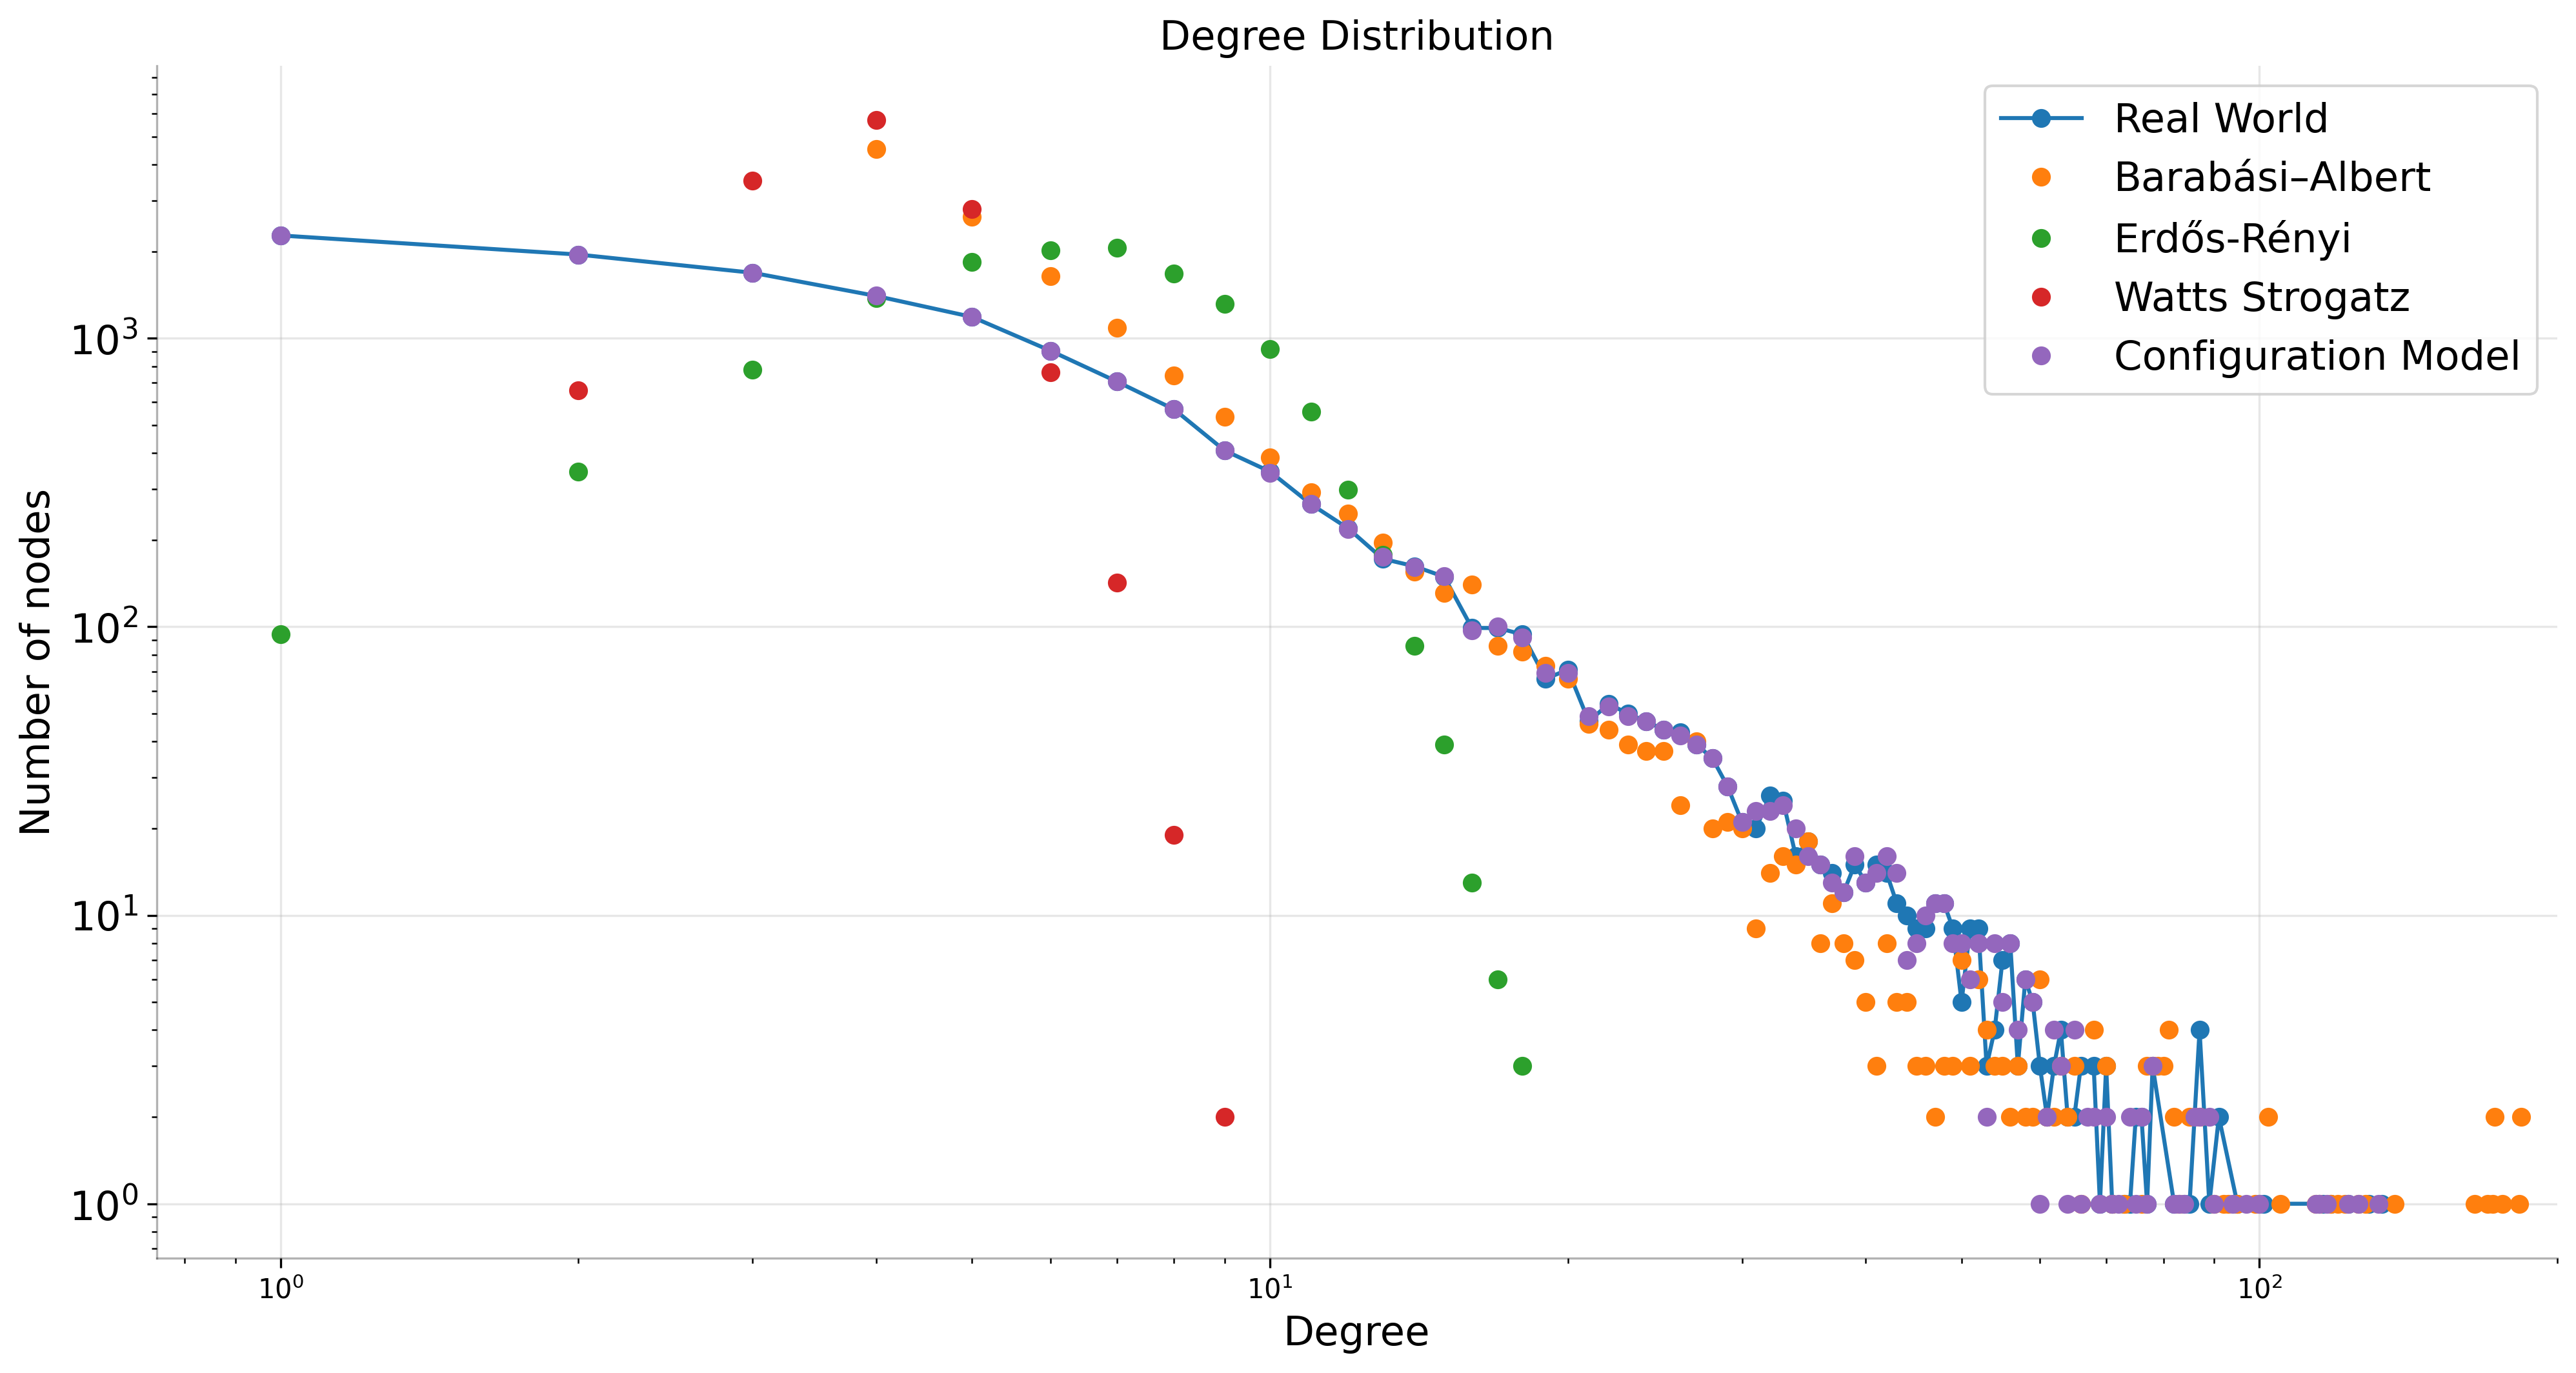

In [ ]:
degree_dist_plot(graphs)

In [ ]:
num_nodi = len(G.nodes)
num_archi = len(G.edges)

# Calcola il grado medio
grado_medio = (2 * num_archi) / num_nodi

print("Numero di Nodi:", num_nodi)
print("Numero di Archi:", num_archi)
print("Grado Medio:", grado_medio)

Numero di Nodi: 13619
Numero di Archi: 46487
Grado Medio: 6.826786107643733


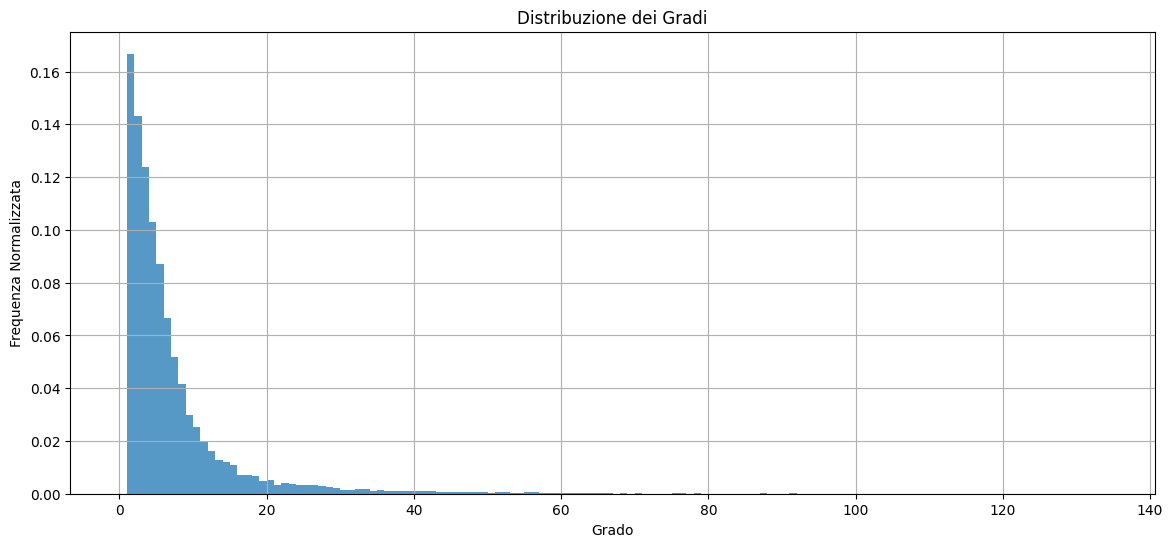

In [ ]:
plt.figure(figsize=(14, 6))
plt.hist(degree_sequence, bins=range(max(degree_sequence) + 2), density=True, alpha=0.75)
plt.title("Distribuzione dei Gradi")
plt.xlabel("Grado")
plt.ylabel("Frequenza Normalizzata")
plt.grid(True)
plt.show()

### Average clustering coefficient

In [ ]:
G_cc = nx.average_clustering(G)
print('Real world average cluster coefficient: ' + str(G_cc) + '\n')
er_net_cc = nx.average_clustering(er)
print('Random network average cluster coefficient: ' + str(er_net_cc) + '\n')
ba_net_cc = nx.average_clustering(ba)
print('Barabasi Albert network average cluster coefficient: ' + str(ba_net_cc) + '\n')
ws_net_cc = nx.average_clustering(ws)
print('WS network average cluster coefficient: ' + str(ws_net_cc) + '\n')
cm_net_cc = nx.average_clustering(cm)
print('CM network average cluster coefficient: ' + str(cm_net_cc) + '\n')

Real world average cluster coefficient: 0.6324676526577806

Random network average cluster coefficient: 0.00029994597391789

Barabasi Albert network average cluster coefficient: 0.004876570932966232

WS network average cluster coefficient: 0.1873910981040699

CM network average cluster coefficient: 0.002738210345531626



### Clustering coefficient distribution

In [ ]:
clustering_g = nx.clustering(G)
clustering_er = nx.clustering(er)
clustering_ba = nx.clustering(ba)
clustering_ws = nx.clustering(ws)
clustering_cm = nx.clustering(cm)

In [ ]:
data = [[min(clustering_g.values()),min(clustering_er.values()),min(clustering_ba.values()), min(clustering_ws.values()), min(clustering_cm.values())]        
        ,[max(clustering_g.values()),max(clustering_er.values()),max(clustering_ba.values()), max(clustering_ws.values()), max(clustering_cm.values())]
        ,[mean(clustering_g.values()),mean(clustering_er.values()),mean(clustering_ba.values()), mean(clustering_ws.values()), mean(clustering_cm.values())]
        ,[stdev(clustering_g.values()),stdev(clustering_er.values()),stdev(clustering_ba.values()), stdev(clustering_ws.values()), stdev(clustering_cm.values())]
        ]
print('Clustering Coefficient')
pd.DataFrame(data, columns=['Real World','Erdos-Renyi','Barabasi-Albert', 'WS', 'Configuration Model'],index=['min','max','mean','stdev'])


Clustering Coefficient


,Real World,Erdos-Renyi,Barabasi-Albert,WS,Configuration Model
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.166667,0.333333,1.000000,1.000000
mean,0.632468,0.000300,0.004877,0.187391,0.002738
stdev,0.389829,0.004429,0.024071,0.201069,0.027725


In [ ]:
clustering_coeff_data = {
    "real_word":{
        "name":"Real World",
        "list":list(clustering_g.values())
    },
    "erdos_renyi":{
        "name":"Erdős-Rényi",
        "list":list(clustering_er.values())
    },
    "watts_strogatz":{
        "name":"Watts Strogatz",
        "list":list(clustering_ws.values())
    },
    "barabasi–Albert":{
        "name":"Barabási Albert",
        "list":list(clustering_ba.values())
    },
    "configuration_model":{
        "name":"Configuration Model",
        "list":list(clustering_cm.values())
    }
}
real_world_coeff_data = {
    "real_word":{
        "name":"Real World",
        "list":list(clustering_g.values())
    }
}

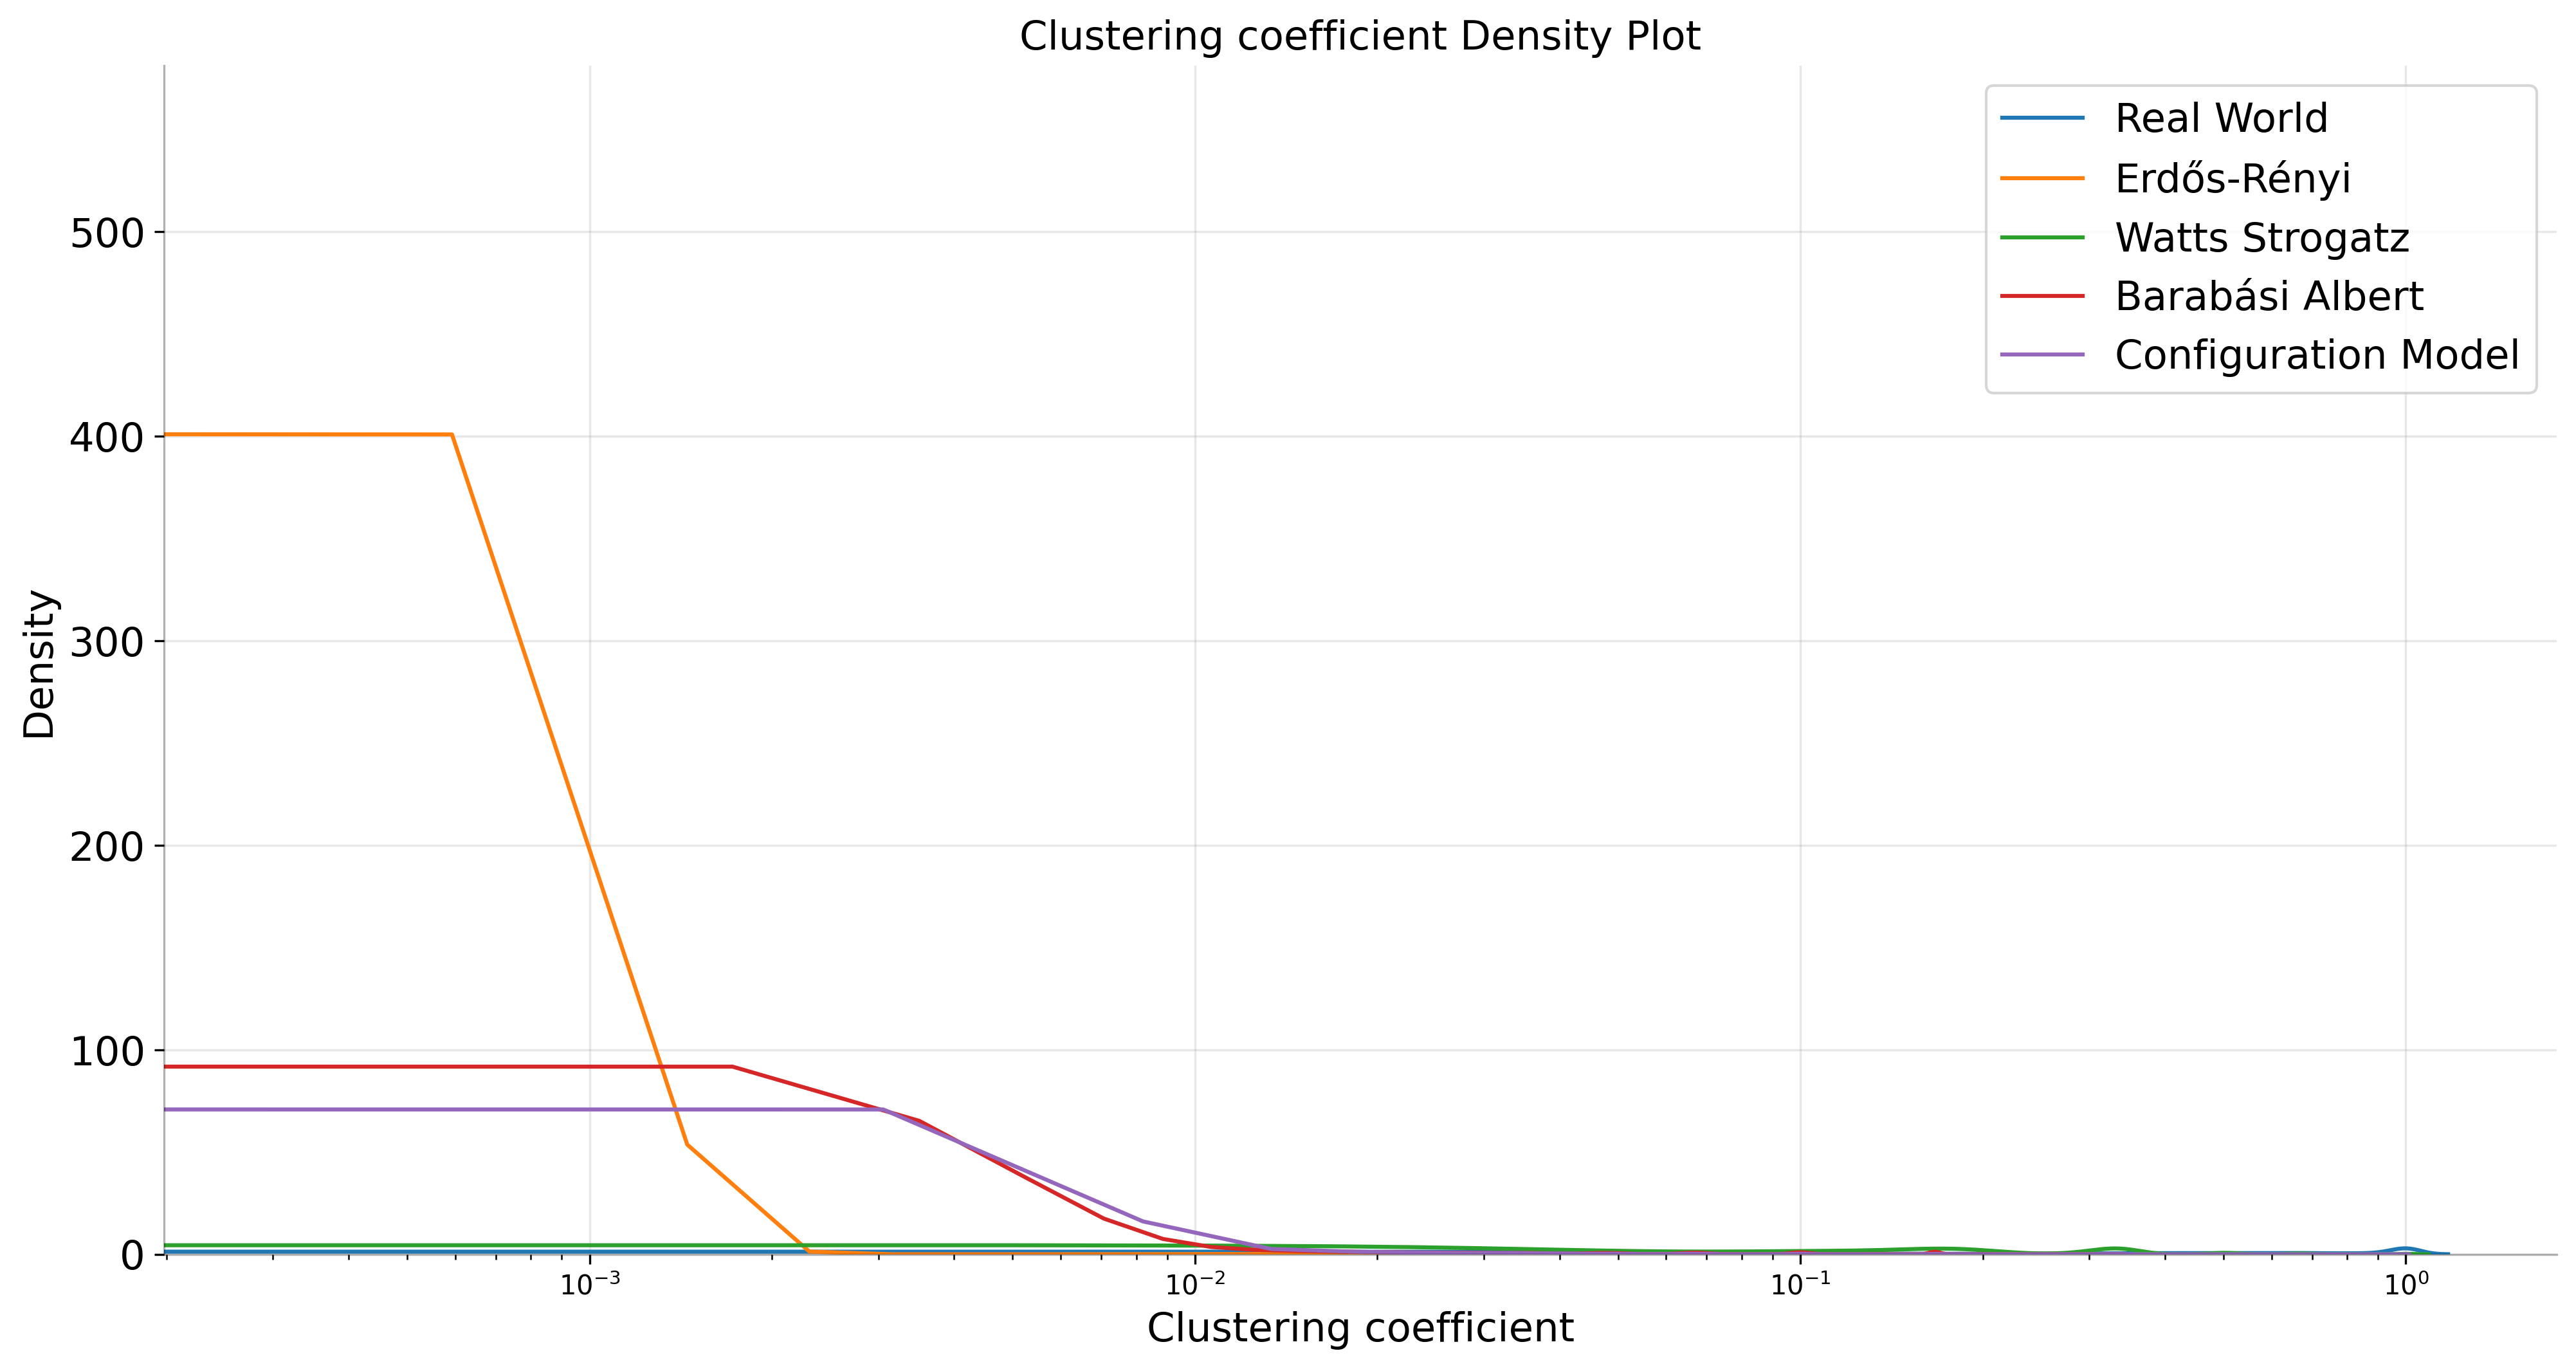

In [ ]:
dist_plot(clustering_coeff_data, "Clustering coefficient")

TypeError: float() argument must be a string or a number, not 'dict'

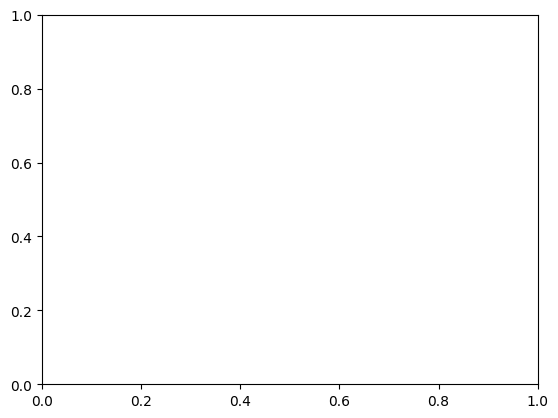

In [ ]:
sns.distplot(clustering_coeff_data, kde=False)
plt.title("Distribuzione del Coefficiente di Clustering")
plt.xlabel("Coefficienti di Clustering")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Giant Component 

In [ ]:
components = nx.connected_components(G)
largest_component = max(components, key=len)
num_nodes = len(largest_component)
G0 = G.subgraph(largest_component)
num_edges = G0.number_of_edges()

In [ ]:
print('The number of nodes of the Giant component is:',num_nodes)
print('The number of edges of the Giant component is:',num_edges)


The number of nodes of the Giant component is: 13237
The number of edges of the Giant component is: 45722


In [ ]:
# Identifica le componenti connesse del grafo
#componenti = nx.connected_components(G)
#print("Componenti connesse:", list(componenti))

# Degree distribution

In [ ]:
print(G.degree)#Undirected

[('HENDERSON BRIAN LESLIE', 6), ('CUI YAN', 41), ('DORRIETY DANIEL JAMES', 8), ('SHUBERT GARY CHARLES', 4), ('COOK PAUL ALBERT', 4), ('BRUNELLE DANIEL JOSEPH', 58), ('PHELPS PETER DAVID', 11), ('BODEN EUGENE PAULING', 52), ('NELSON MARK ERIK', 11), ('FLOWERS LARRY IVIS', 11), ('SYBERT PAUL DEAN', 13), ('DICINTIO RICHARD MARTIN', 11), ('MELTON PATRICK BENEDICT', 49), ('STOIA LUCAS JOHN', 42), ('WILLIS CHRISTOPHER PAUL', 6), ('PENTECOST RONNIE RAY', 7), ('DAVIS JR LEWIS BERKLEY', 25), ('DAY SCOTT ARTHUR', 5), ('JORDAN JR HAROLD LAMAR', 5), ('MORGAN REX ALLEN', 5), ('VYSOHLID MARTIN', 1), ('HOFER DOUGLAS CARL', 38), ('MONIZ THOMAS ORY', 39), ('ROSE JOSEPH GEORGE', 5), ('ORLANDO ROBERT JOSEPH', 20), ('KUSCH RUEDIGER SOEREN', 2), ('KING ROBERT DEAN', 35), ('STEIGERWALD ROBERT LOUIS', 2), ('KULKARNI AMBARISH JAYANT', 33), ('KESHAVAN HRISHIKESH', 22), ('DEDE MEHMET', 11), ('BEWLAY BERNARD PATRICK', 123), ('WANG GUANGHUA', 12), ('PRITCHARD BYRON', 13), ('IDELCHIK MICHAEL SOLOMON', 11), ('WEIME

In [ ]:
degree_dict = dict(G.degree())

In [ ]:
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Stampa il grado dei nodi in ordine decrescente
for node, degree in sorted_degree:
    print(f"Nodo: {node}, Grado: {degree}")

Nodo: SAKO YOICHIRO, Grado: 133
Nodo: CHENG KANGGUO, Grado: 129
Nodo: BEWLAY BERNARD PATRICK, Grado: 123
Nodo: KONDO TETSUJIRO, Grado: 118
Nodo: KUMAR AJITH KUTTANNAIR, Grado: 116
Nodo: SATO HIROSHI, Grado: 115
Nodo: TURNQUIST NORMAN ARNOLD, Grado: 101
Nodo: IKEDA MASAMI, Grado: 100
Nodo: MCCLOSKEY PATRICK JOSEPH, Grado: 95
Nodo: LEE CHING-PANG, Grado: 91
Nodo: SUGAMA SADAYUKI, Grado: 91
Nodo: ISHINAGA HIROYUKI, Grado: 89
Nodo: LEWIS LARRY NEIL, Grado: 87
Nodo: HERSHEY JOHN ERIK, Grado: 87
Nodo: KASHINO TOSHIO, Grado: 87
Nodo: YAMAMOTO AKIRA, Grado: 87
Nodo: KARITA SEIICHIRO, Grado: 85
Nodo: HIRABAYASHI HIROMITSU, Grado: 84
Nodo: GLYNN CHRISTOPHER CHARLES, Grado: 82
Nodo: KRAY NICHOLAS JOSEPH, Grado: 78
Nodo: KOTAKI YASUO, Grado: 78
Nodo: YANG CHIH-CHAO, Grado: 78
Nodo: BUNKER RONALD SCOTT, Grado: 77
Nodo: JACOBI CHRISTIAN, Grado: 76
Nodo: LEE JU-HO, Grado: 76
Nodo: NISHIMURA ASAO, Grado: 75
Nodo: DORIS BRUCE B, Grado: 75
Nodo: SADANA DEVENDRA K, Grado: 74
Nodo: TAJIKA HIROSHI, Grado: 

In [ ]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
# alternate form, maybe less convenient
# degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

In [ ]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)
print()
print("Degree sequence: ", degrees)

Number of nodes:  13619
Number of edges:  46487

Average degree:  6.826786107643733
Average degree (alternate calculation) 6.826786107643733

Minimum degree:  1
Maximum degree:  133

Degree sequence:  [6, 41, 8, 4, 4, 58, 11, 52, 11, 11, 13, 11, 49, 42, 6, 7, 25, 5, 5, 5, 1, 38, 39, 5, 20, 2, 35, 2, 33, 22, 11, 123, 12, 13, 11, 31, 5, 10, 14, 116, 8, 44, 1, 23, 7, 46, 9, 5, 18, 52, 5, 27, 31, 34, 3, 2, 34, 5, 13, 4, 3, 45, 2, 57, 5, 2, 6, 52, 3, 46, 15, 26, 8, 4, 31, 27, 11, 6, 48, 24, 17, 13, 11, 53, 95, 10, 42, 58, 87, 1, 1, 47, 35, 13, 48, 8, 40, 42, 12, 23, 27, 63, 11, 2, 68, 6, 18, 33, 18, 10, 15, 15, 19, 15, 11, 13, 22, 5, 5, 58, 8, 56, 1, 63, 2, 5, 9, 7, 3, 3, 91, 7, 2, 40, 29, 10, 39, 8, 26, 59, 2, 2, 2, 5, 64, 2, 2, 1, 1, 46, 14, 8, 6, 50, 4, 15, 4, 33, 8, 2, 4, 7, 4, 4, 3, 3, 11, 4, 9, 4, 11, 101, 5, 20, 55, 4, 13, 7, 8, 87, 23, 8, 6, 8, 5, 10, 4, 4, 2, 3, 17, 17, 13, 13, 5, 2, 65, 17, 1, 11, 19, 30, 15, 4, 2, 78, 1, 2, 12, 17, 19, 48, 70, 19, 63, 13, 7, 23, 5, 1, 77, 65, 11,

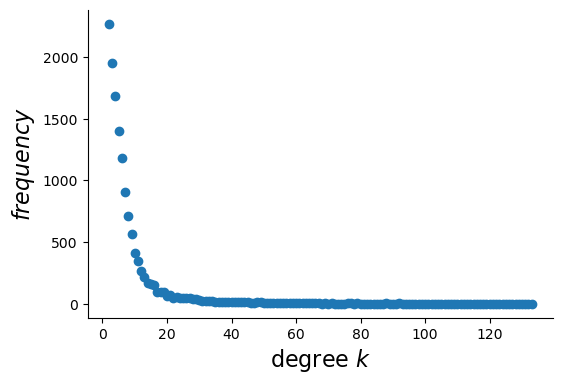

In [ ]:
bin_edges = np.linspace(kmin, kmax, num=kmax-kmin+1)

density, _ = np.histogram(degrees, bins=kmax-kmin, density=False)

fig = plt.figure(figsize=(6,4))

x = bin_edges[kmin:kmax+1]
plt.plot(x, density, marker='o', linestyle='none')

plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$frequency$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.show()

In [ ]:
# using the force-based or "spring" layout algorithm
#fig = plt.figure(figsize=(8,8))
#nx.draw_spring(G, node_size=40)

KeyboardInterrupt: 

<Figure size 800x800 with 0 Axes>

In [ ]:
degree_centrality = nx.degree_centrality(G)
print("Centralità di grado:", degree_centrality)

closeness_centrality = nx.closeness_centrality(G)
print("Centralità di vicinanza:", closeness_centrality)

betweenness_centrality = nx.betweenness_centrality(G)
print("Centralità di intermediazione:", betweenness_centrality)

Centralità di grado: {'HENDERSON BRIAN LESLIE': 0.000440593332354237, 'CUI YAN': 0.0030107211044206198, 'DORRIETY DANIEL JAMES': 0.000587457776472316, 'SHUBERT GARY CHARLES': 0.000293728888236158, 'COOK PAUL ALBERT': 0.000293728888236158, 'BRUNELLE DANIEL JOSEPH': 0.004259068879424291, 'PHELPS PETER DAVID': 0.0008077544426494345, 'BODEN EUGENE PAULING': 0.003818475547070054, 'NELSON MARK ERIK': 0.0008077544426494345, 'FLOWERS LARRY IVIS': 0.0008077544426494345, 'SYBERT PAUL DEAN': 0.0009546188867675135, 'DICINTIO RICHARD MARTIN': 0.0008077544426494345, 'MELTON PATRICK BENEDICT': 0.0035981788808929355, 'STOIA LUCAS JOHN': 0.003084153326479659, 'WILLIS CHRISTOPHER PAUL': 0.000440593332354237, 'PENTECOST RONNIE RAY': 0.0005140255544132766, 'DAVIS JR LEWIS BERKLEY': 0.0018358055514759875, 'DAY SCOTT ARTHUR': 0.0003671611102951975, 'JORDAN JR HAROLD LAMAR': 0.0003671611102951975, 'MORGAN REX ALLEN': 0.0003671611102951975, 'VYSOHLID MARTIN': 7.34322220590395e-05, 'HOFER DOUGLAS CARL': 0.0027

KeyboardInterrupt: 

In [ ]:
degree_dist = nx.degree_histogram(G)
print("Distribuzione di grado: ", degree_dist)

### Plot it in log scale

logarithmically-spaced bins between the minimum and maximum degree

In [ ]:
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=50)

density, _ = np.histogram(degrees, bins=bin_edges, density=True)

# `_` indicates that `np.histogram()` is returning a tuple of two items, and we don't care about
# what's in the second element. what is the other thing it's returning? check the docs:
# https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

In [ ]:
bin_edges

array([  1.        ,   1.10495327,   1.22092173,   1.34906145,
         1.49064986,   1.64709844,   1.8199668 ,   2.01097827,
         2.22203701,   2.45524706,   2.71293326,   2.99766448,
         3.31227916,   3.65991369,   4.04403359,   4.46846814,
         4.93744848,   5.45564983,   6.02823812,   6.66092141,
         7.36000689,   8.13246367,   8.98599232,   9.92910158,
        10.97119325,  12.12265585,  13.3949682 ,  14.8008139 ,
        16.3542077 ,  18.07063526,  19.9672075 ,  22.0628312 ,
        24.37839745,  26.93698995,  29.7641151 ,  32.88795628,
        36.33965479,  40.15362035,  44.36787407,  49.02442748,
        54.1697014 ,  59.85498863,  66.13696534,  73.07825605,
        80.7480579 ,  89.22283053,  98.58705825, 108.93409228,
       120.36708135, 133.        ])

In [ ]:
density

array([1.58882456e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.49600652e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.93489692e-01,
       0.00000000e+00, 2.67809576e-01, 0.00000000e+00, 0.00000000e+00,
       1.67909236e-01, 1.16054211e-01, 0.00000000e+00, 7.43631467e-02,
       5.38968829e-02, 0.00000000e+00, 3.17652978e-02, 2.43090480e-02,
       3.09276331e-02, 9.92634765e-03, 8.46120346e-03, 1.17226256e-02,
       8.25632178e-03, 2.55522605e-03, 6.02656613e-03, 3.07587939e-03,
       2.49673765e-03, 2.64917055e-03, 1.57485523e-03, 1.57417729e-03,
       1.03961317e-03, 8.71172397e-04, 7.72656160e-04, 4.28121989e-04,
       3.74541863e-04, 2.22081335e-04, 9.52044079e-05, 8.61614790e-05,
       6.93133217e-05, 2.35236153e-05, 1.41928267e-05, 1.92670953e-05,
       1.74370228e-05])

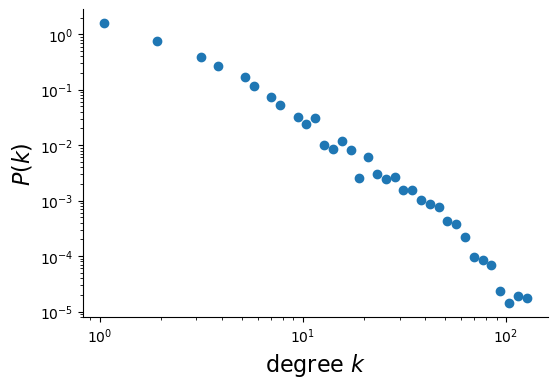

In [ ]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

### Plot it in linear scale

In [ ]:
# Get num equally spaced bins between kmin and kmax
# Take care, the number of bins matters to avoid the curve up and down
bin_edges = np.linspace(kmin, kmax, num=30)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

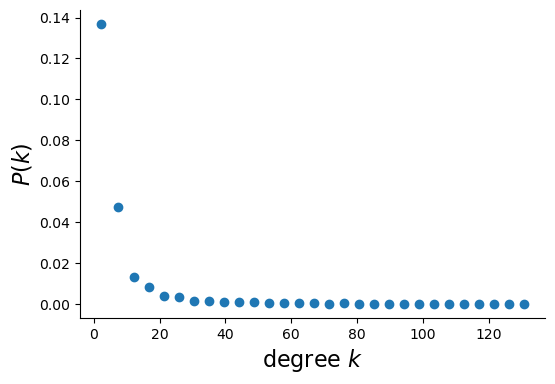

In [ ]:
fig = plt.figure(figsize=(6,4))

# "x" is in the midpoint of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# Different Plots

In [ ]:
# using the fcircular layout algorithm
#fig = plt.figure(figsize=(8,8))
#nx.draw_circular(G, node_size=40)

In [ ]:
# using the force-based or "spring" layout algorithm
#fig = plt.figure(figsize=(8,8))
#nx.draw_spring(G, node_size=40)

In [ ]:
# PUT YOUR CODE HERE (you will only need to call a function)

# Print diameter of the network

print("Diameter of G:", nx.diameter(G0))

# Print average (shortest-)path length

#print("Average path length of G:", nx.average_shortest_path_length(G))

KeyboardInterrupt: 

# Path analysis

In [ ]:
df

,Source,Target,Weight
0,HENDERSON BRIAN LESLIE,CUI YAN,28
1,HENDERSON BRIAN LESLIE,DORRIETY DANIEL JAMES,28
2,HENDERSON BRIAN LESLIE,SHUBERT GARY CHARLES,12
3,HENDERSON BRIAN LESLIE,COOK PAUL ALBERT,28
4,CUI YAN,DORRIETY DANIEL JAMES,54
...,...,...,...
400927,INOUE HAJIME,SHIMA HISATO,14
400939,MATSUMOTO ATSUSHI,NISHIGUCHI MASAYUKI,17
402379,TSUBOI HISANORI,UCHINO KATSUHIDE,12
402476,NAKAMURA TAKATOSHI,SAKATA JUNICHIRO,12


In [ ]:
# DiGraph (grafo diretto)
G = nx.DiGraph()

# Aggiungiamo gli archi al grafo con i rispettivi pesi
for row in df.itertuples(index=False):
    source = row.Source
    target = row.Target
    weight = row.Weight
    G.add_edge(source, target, weight=weight)

In [ ]:
# Calcolo dei percorsi più brevi tra due nodi
shortest_path = nx.shortest_path(G, source='HENDERSON BRIAN LESLIE', target='CUI YAN')# per esempio

# Calcolo della lunghezza dei percorsi più brevi
shortest_path_length = nx.shortest_path_length(G, source='HENDERSON BRIAN LESLIE', target='CUI YAN')#per esempio

KeyboardInterrupt: 

# 2. Clustering coefficient

## Degree Centrality

In [ ]:
# Calcola la centralità di grado
degree_centrality = nx.degree_centrality(G0)
print("Centralità di grado:", degree_centrality)

# Calcola la centralità di vicinanza
closeness_centrality = nx.closeness_centrality(G0)
print("Centralità di vicinanza:", closeness_centrality)

# Calcola la centralità di intermediazione
betweenness_centrality = nx.betweenness_centrality(G0)
print("Centralità di intermediazione:", betweenness_centrality)

eigenvector_centrality = nx.eigenvector_centrality(G)

ERROR! Session/line number was not unique in database. History logging moved to new session 495
Centralità di grado: {'HENDERSON BRIAN LESLIE': 0.00045330915684496827, 'CUI YAN': 0.00309761257177395, 'DORRIETY DANIEL JAMES': 0.0006044122091266244, 'SHUBERT GARY CHARLES': 0.0003022061045633122, 'COOK PAUL ALBERT': 0.0003022061045633122, 'BRUNELLE DANIEL JOSEPH': 0.004381988516168027, 'PHELPS PETER DAVID': 0.0008310667875491085, 'BODEN EUGENE PAULING': 0.003928679359323058, 'NELSON MARK ERIK': 0.0008310667875491085, 'FLOWERS LARRY IVIS': 0.0008310667875491085, 'SYBERT PAUL DEAN': 0.0009821698398307646, 'DICINTIO RICHARD MARTIN': 0.0008310667875491085, 'MELTON PATRICK BENEDICT': 0.003702024780900574, 'STOIA LUCAS JOHN': 0.003173164097914778, 'WILLIS CHRISTOPHER PAUL': 0.00045330915684496827, 'PENTECOST RONNIE RAY': 0.0005288606829857963, 'DAVIS JR LEWIS BERKLEY': 0.0018887881535207011, 'DAY SCOTT ARTHUR': 0.0003777576307041402, 'JORDAN JR HAROLD LAMAR': 0.0003777576307041402, 'MORGAN REX 

KeyboardInterrupt: 

### Generating Random Networks (Erdos-Renyi)

In [ ]:
import random

In [ ]:
Number_of_nodes=13237
p=0.4

G=nx.Graph()
for n in range(Number_of_nodes): 
    G.add_node(n)

node_list=G.nodes()

#generate the graph adding an edge for each possible couple of nodes with probability p
for i1 in range(len(node_list)-1):
    for i2 in range(i1+1,len(node_list)):
        
        if random.random()<p:
            G.add_edge(i1,i2)

# If the number on nodes is low, diferent runs will result in quite different graphs
pos=nx.circular_layout(G)   
nx.draw(G, pos,with_labels=True)

# Plot histogram
# hist(degree_sequence,bins=15)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/6k/g1z99pln751crdj0qgk4nhtw0000gn/T/ipykernel_45461/2292364409.py", line 15, in <module>
    G.add_edge(i1,i2)
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/networkx/classes/graph.py", line 889, in add_edge
    datadict = self._adj[u].get(v, self.edge_attr_dict_factory())
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Tra

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/6k/g1z99pln751crdj0qgk4nhtw0000gn/T/ipykernel_45461/2292364409.py", line 15, in <module>
    G.add_edge(i1,i2)
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/networkx/classes/graph.py", line 889, in add_edge
    datadict = self._adj[u].get(v, self.edge_attr_dict_factory())
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/giuseppepalminteri/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Tra

TypeError: object of type 'NoneType' has no len()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ba1d0b84-8b74-40fa-8475-876b80bfb255' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>